# Time Series Data

## 시계열 데이터란?

- 시간의 흐름에 대해 특정 패턴과 같은 정보를 가지고 있는 경우를 시계열 데이터라고 함
- 통계학에서 시계열 데이터라는 것 만으로도 많은 학습량을 가지고 있다
- 보통 데이터 분석에서 개요 정도의 레벨에서 접근하는 시계열은 대부분 Forecast이다
- 그리고 시계열 데이터에서 주기성을 가지고 있는 데이터를 다루는 경우를 Seasonal Time Series라고 한다


### 예를 들어 삼성전자의 주가를 분석하고자 한다면,

![samsung](../data/samsung.png)

- 먼저 트렌드를 찾아야 한다
- 트렌드를 제외한 주기적 특성을 찾아야 한다

- 통계적 지식이나 이론에 대해 이야기할 것이 아니라 그저 목표료 하는 데이터가 하필 시계열 데이터였다
- 하필 단일 함수로 쉽게 접근할 수 없어서 Python이라는 도구로 Forecast를 하고 싶을 뿐이라면,
- Seasonal Time Series에 대한 좋은 모듈이 최근 발표되었다
- Facebook에서 만든 fb-Prophet
- 윈도우 유저는 Visual C++ Build Tool을 먼저 설치해야 한다
- https://go.microsoft/fwlink/?LinkId=691126
- conda install pandas-datareader
- conda install -c conda-forge fbprophet

---

# def의 기초

In [1]:
def test_def(a, b):
    return a + b

In [2]:
test_def(2, 3)

5

- 가장 기초적인 모양의 def 정의
- 이름(test_df)과 입력 인자(a, b)를 정해주고
- 출력(return)을 작성하는 모양

In [3]:
a = 1

def edit_a(i):
    global a
    a = i

In [4]:
edit_a(2)
print(a)

2


- global 변수를 def 내에서 사용하고 싶다면 global로 선언할 것

In [5]:
def edit_a(i):
    a = i

In [6]:
edit_a(3)
print(a)

2


- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(
        str(amp) + "*sin(2*pi*" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias)
    )
    plt.show()

- sin함수를 구성하기 위해 필요한 인자들을 def의 입력변수로 받는다

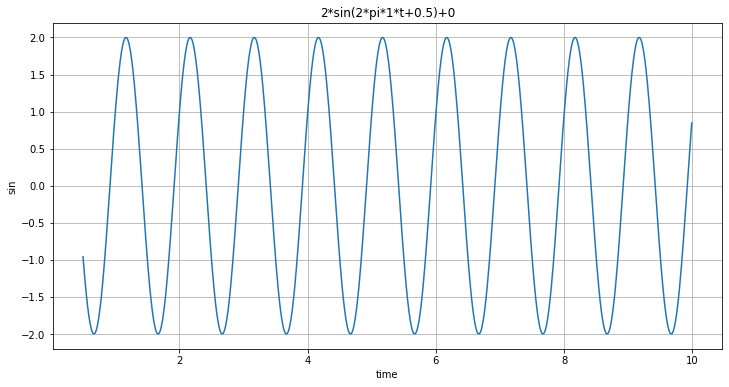

In [9]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

- 인자의 이름, 순서 입력하기 까다롭다

In [10]:
def plotSinWave(**kwargs): # keyword argument: 키워드를 불러올 수 있다
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get('endTime', 1)
    sampleTime = kwargs.get('sampleTime', 0.01)
    amp = kwargs.get('amp', 1)
    freq = kwargs.get('freq', 1)
    startTime = kwargs.get('startTime', 0)
    bias = kwargs.get('bias', 0)
    figsize = kwargs.get('figsize', (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=figsize)
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(
        str(amp) + "*sin(2*pi*" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias)
    )
    plt.show()

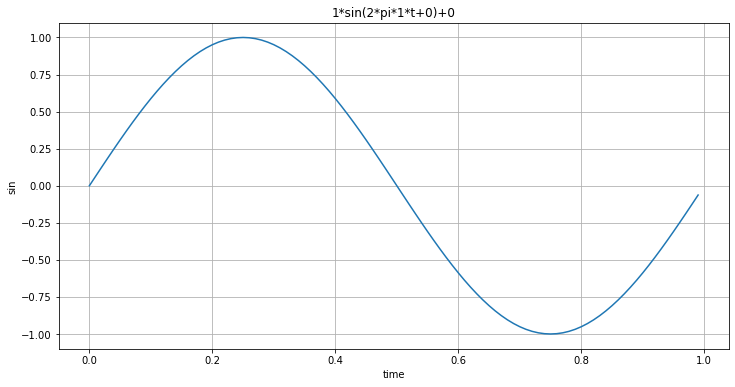

In [11]:
plotSinWave()

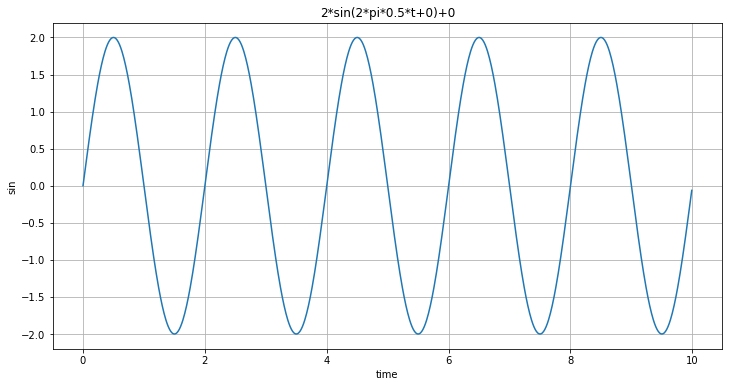

In [12]:
plotSinWave(amp=2, freq=0.5, endTime=10)

- 내가 만든 함수에 녹스트링을 확인하면 """(내용)""" 이 나온다

## 내가 만든 함수를 import 해보자

- 모듈을 만들기 위해서 .py 파일을 만들어야 한다. vscode 활용

In [1]:
import drawSineWave as dS

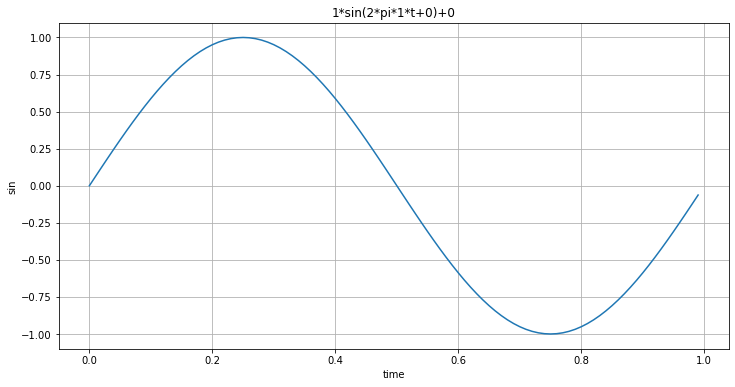

In [2]:
dS.plotSinWave()

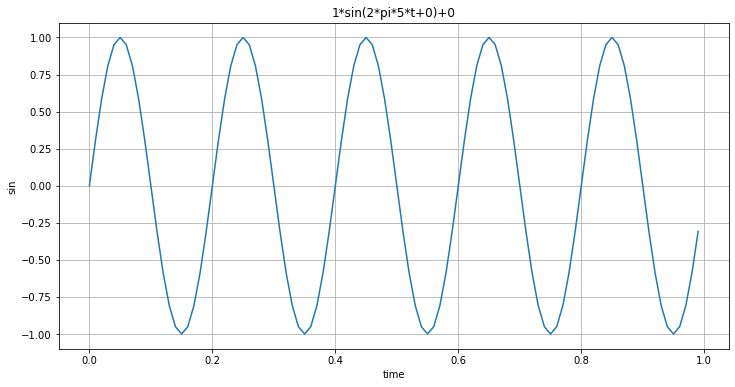

In [3]:
dS.plotSinWave(freq=5)

In [4]:
import set_matplotlib_hangul

Hangul OK in your Windows !!!


## Fbprophet 기초

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df.head()

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


- 간단한 데이터 생성

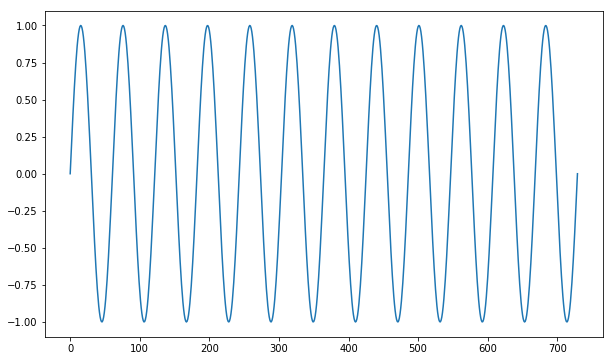

In [5]:
df['y'].plot(figsize=(10, 6));

- 데이터 확인

In [8]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [9]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

- 예측을 시도해보자

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


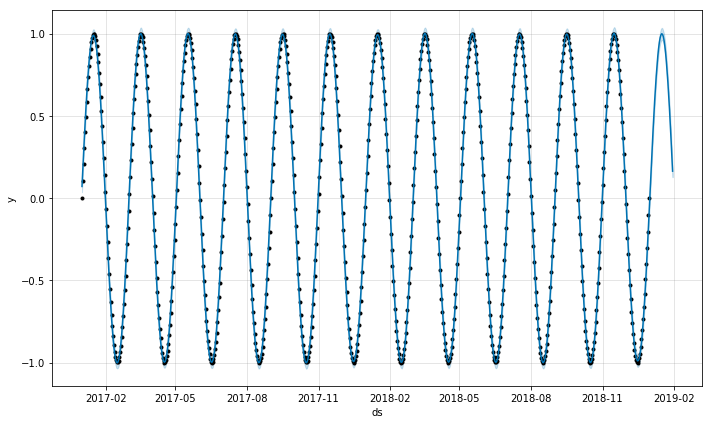

In [10]:
m.plot(forecast);

- 점선으로 이어진 그래프는 실제 데이터, 실선은 예측 데이터!

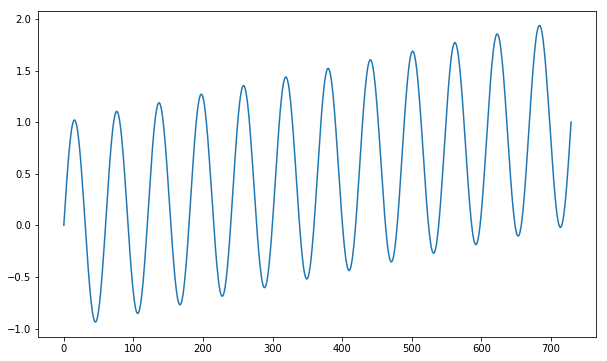

In [11]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10, 6));

- 단순 그래프에서 조금 더 변화를 주자

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


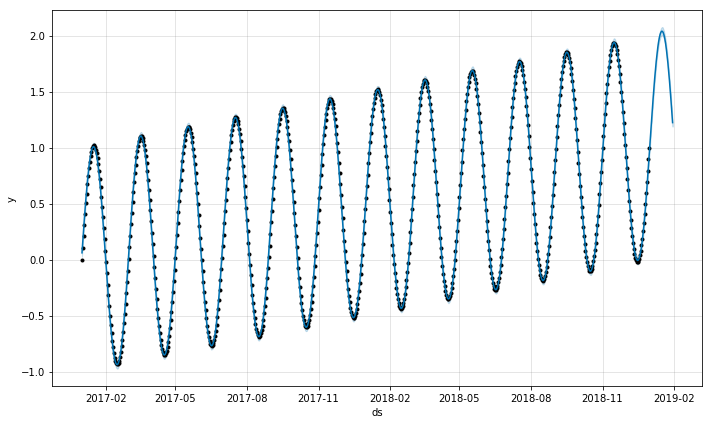

In [12]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

- 예측이 괜찮다!

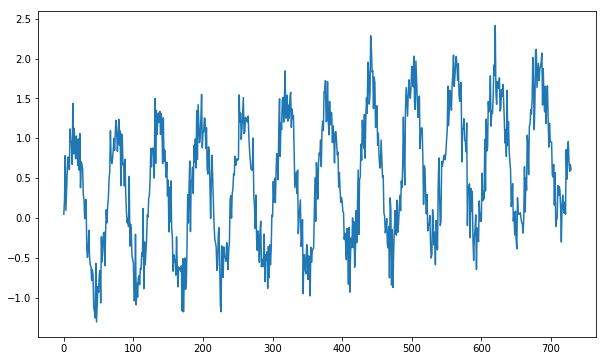

In [13]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10, 6));

- 그래프에 노이즈를 살짝 실어보자

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


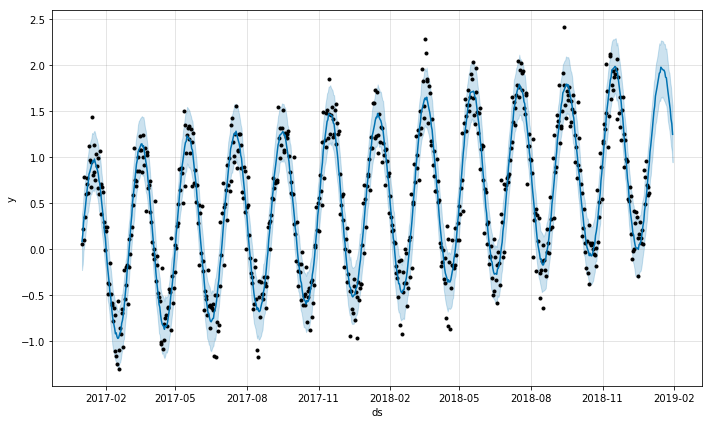

In [14]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

## 시계열 데이터 실전 이용해보기
### 블로그 데이터 forecast

- 먼저 numpy를 이용해서 trend 파악을 해보자

In [15]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

import set_matplotlib_hangul

#%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

Hangul OK in you Windows!!


In [16]:
pinkwink_web = pd.read_csv(
    '../data/05_PinkWink_Web_Traffic.csv',
    encoding='utf-8',
    thousands=',',
    names=['date', 'hit'],
    index_col=0,
)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


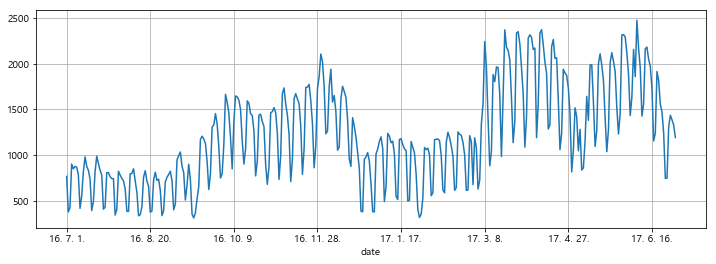

In [17]:
pinkwink_web['hit'].plot(figsize=(12, 4), grid=True);

- pinkwink 웹의 방문객 수 (2016년부터 2017년 중반까지)

In [18]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [19]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

- trend 분석을 시각화하기 위한 x축 값들을 만들어 두고
- 에러를 계산할 함수도 만들어 두자

In [23]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [24]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109637
430.6284101894695
429.53280466762925
330.4777305307993


- 1차, 2차, 3차 함수까지는 에러의 큰 차이가 없다

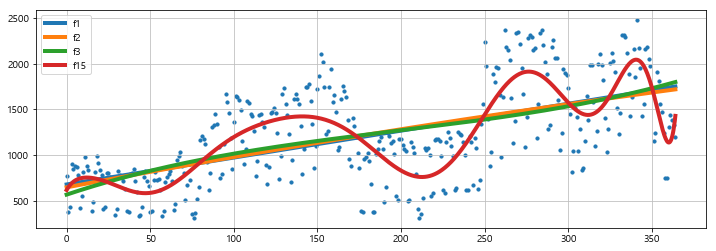

In [25]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc='best')
plt.show()

In [26]:
df = pd.DataFrame({'ds': pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


- 데이터를 prophet에서 사용하기 좋게 바꾸자

In [27]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

- prophet에 적용

In [28]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


- 이 후 60일에 해당하는 데이터를 예측해보자

In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,680.427618,1112.094873
421,2017-08-26,481.544412,257.719911,695.546350
422,2017-08-27,614.212001,414.444884,829.897131
423,2017-08-28,1166.966207,960.038942,1365.746783
424,2017-08-29,1203.000155,1002.706690,1414.993965


- 예측 결과는 상한/하한의 범위를 포함해서 얻어진다

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


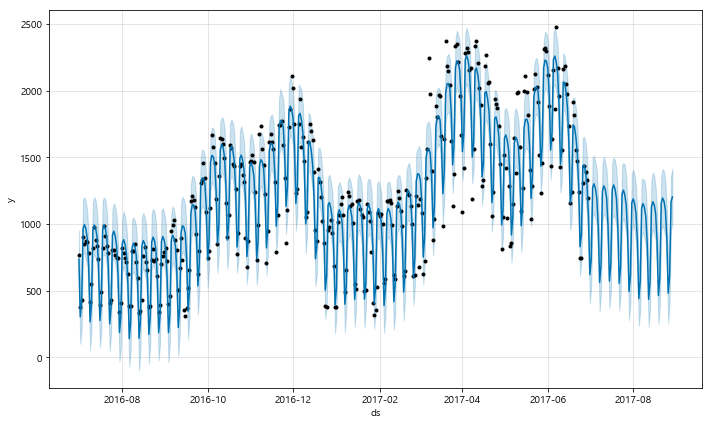

In [30]:
m.plot(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

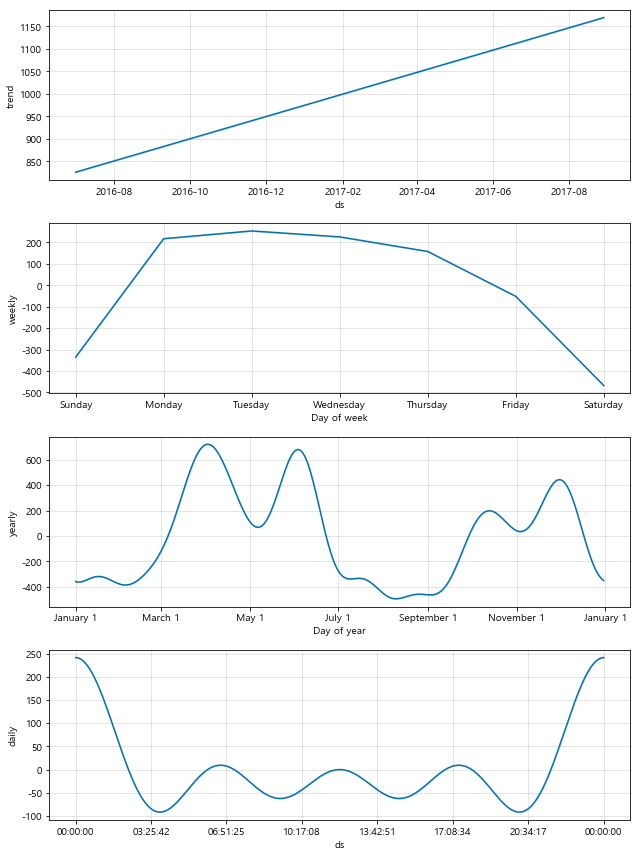

In [31]:
m.plot_components(forecast);

- forecast 결과에 대해 component를 확인할 수 있다

## 주식 데이터 fbprophet으로 분석하기
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1

In [38]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

req = Request(
    'https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS',
    headers={'User-Agent': 'Chrome'},
)
page = urlopen(req).read()

soup = BeautifulSoup(page, 'html.parser')
table = soup.find('table')
df_raw = pd.read_html(str(table))[0]
df_raw.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 08, 2021",397500.00,397500.00,388000.00,388500.00,388500.00,542514
1,"Oct 07, 2021",380500.00,394000.00,378000.00,393500.00,393500.00,832068
2,"Oct 06, 2021",373000.00,383500.00,371500.00,373000.00,373000.00,826716
3,"Oct 05, 2021",378500.00,380000.00,370000.00,370500.00,370500.00,828794
4,"Oct 01, 2021",388500.00,389500.00,381500.00,382000.00,382000.00,402239


- 원하는 정보가 table 태그안에 있을 경우 아주 쉽게 정보를 가져올 수 있다
- 단 약간의 사용법상 주의점만 감안하면 된다

In [40]:
df_tmp = pd.DataFrame({'ds': df_raw['Date'], 'y': df_raw['Close*']})
df_target = df_tmp[:-1]
df_target.head()

,ds,y
0,"Oct 08, 2021",388500.00
1,"Oct 07, 2021",393500.00
2,"Oct 06, 2021",373000.00
3,"Oct 05, 2021",370500.00
4,"Oct 01, 2021",382000.00


- fbprophet을 사용하는 형식을 맞춰주고
- 맨 마지막에 NaN이 있어서 제외

In [43]:
df = df_target.copy()
df['ds'] = pd.to_datetime(df_target['ds'], format='%b %d, %Y')
df.head()

,ds,y
0,2021-10-08,388500.00
1,2021-10-07,393500.00
2,2021-10-06,373000.00
3,2021-10-05,370500.00
4,2021-10-01,382000.00


- Hard Copy를 시키고
- 날짜를 fbprophet이 요구하는 형태로 바꿔준다

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


- y컬럼의 데이터 타입이 문자열(object)로 되어 있다
- 실수형(float)으로 변환

In [45]:
# 데이터형 변환 object => float
df['y'] = df['y'].astype('float')

In [46]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [47]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
125,2021-11-03,435819.774712,424016.083593,447161.303176
126,2021-11-04,440183.547603,428559.924934,451032.711583
127,2021-11-05,443571.834845,432913.001279,456152.656116
128,2021-11-06,441912.178215,430135.211764,453378.833861
129,2021-11-07,444030.247793,433139.388100,455538.422809


C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

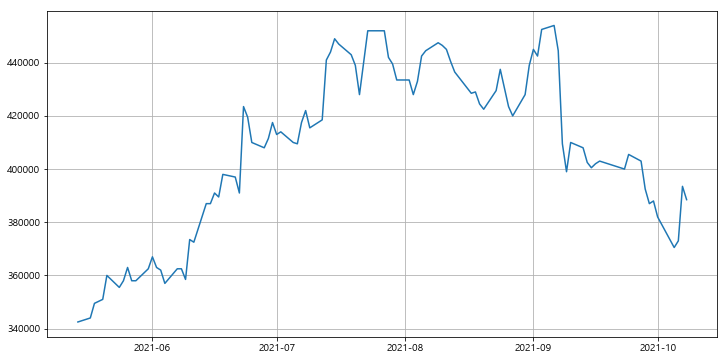

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='real')
plt.grid()
plt.show()

- 종가 기준의 네이버 주식 데이터

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

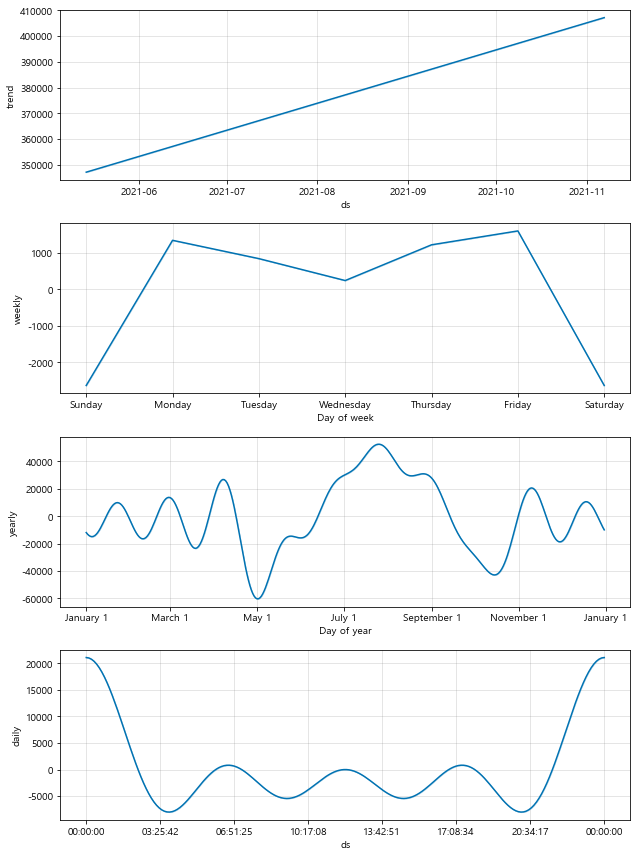

In [49]:
m.plot_components(forecast);

- pip install yfinance
- 원래 Pandas는 data_reader를 통해 주가 정보를 얻어오는 기능이 있었다
- 그런데 최근 구글과 야후의 안정성 문제로 이 기능이 동작하지 않는다
- 그래서 우회적으로 야후의 기능을 복구시켜주는 모듈이 임시로 만들어졌다
- 설치!

In [110]:
from pandas_datareader import data
import yfinance as yf

yf.pdr_override()

start_date = '2010-03-01'
end_date = '2018-02-28'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


- 사용법은 간단하다. 기아자동차의 종목코드를 가지고 기간을 입력하면 끝~

In [111]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17800.660156,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,18248.732422,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,18330.201172,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,18533.867188,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,18574.601562,4326618


In [112]:
KIA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-21,32800.0,34150.0,32500.0,33850.0,31586.882812,1160172
2018-02-22,33650.0,34150.0,33500.0,33650.0,31400.251953,821623
2018-02-23,33900.0,34150.0,33450.0,34000.0,31726.849609,1023856
2018-02-26,34000.0,34400.0,33600.0,34200.0,31913.480469,723488
2018-02-27,34400.0,34800.0,34300.0,34450.0,32146.767578,890367


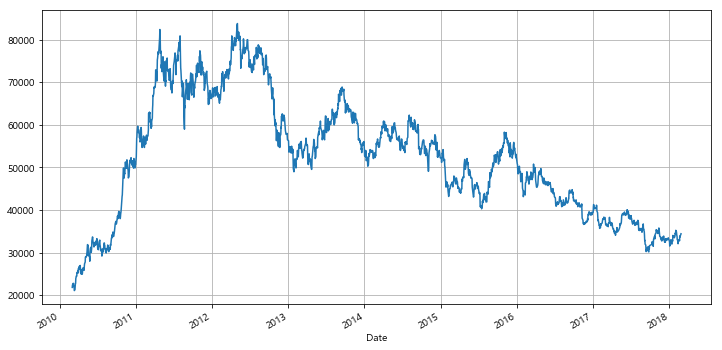

In [77]:
KIA['Close'].plot(figsize=(12, 6), grid=True);

- 기아자동차의 8년간의 주가 데이터 (종가기준)

In [78]:
KIA_trunc = KIA[:'2017-11-30']
KIA_trunc.head();

- 나중에 비교를 위해 조금 잘라두자, accuracy를 확인해보자

In [79]:
df = pd.DataFrame({'ds': KIA_trunc.index, 'y': KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


- Forecast를 위한 준비

In [80]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [81]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2001,2018-02-24,26879.820301,22690.919901,31068.678132
2002,2018-02-25,26962.113329,22720.724789,30964.784949
2003,2018-02-26,27189.323268,22661.396453,31454.133019
2004,2018-02-27,27353.074108,22791.500898,31530.959913
2005,2018-02-28,27398.864477,22871.699961,31875.042026


C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


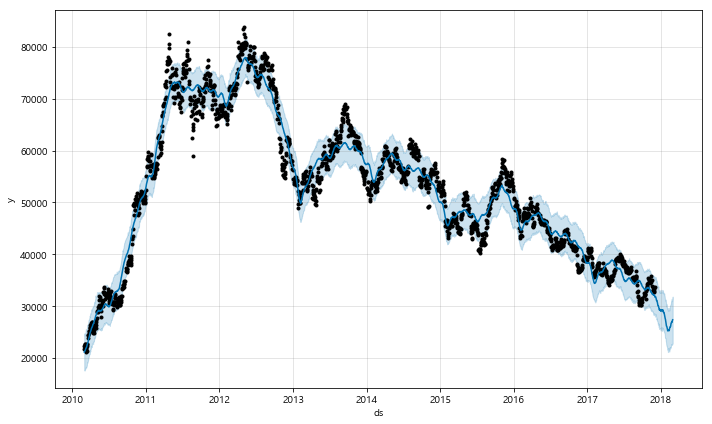

In [82]:
m.plot(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

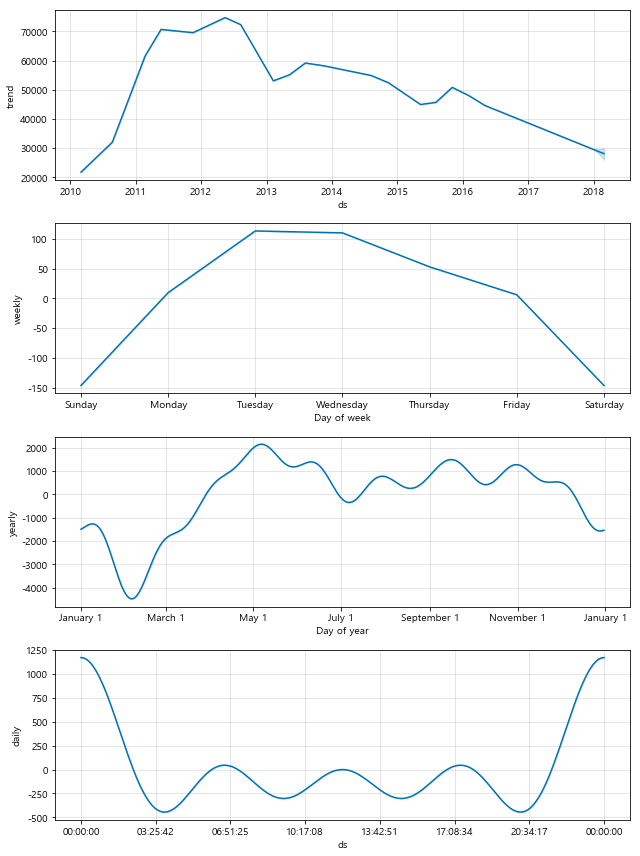

In [83]:
m.plot_components(forecast);

#### 실제 10년치 기아자동차 주가 그래프
![kia](../data/kia.png)

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

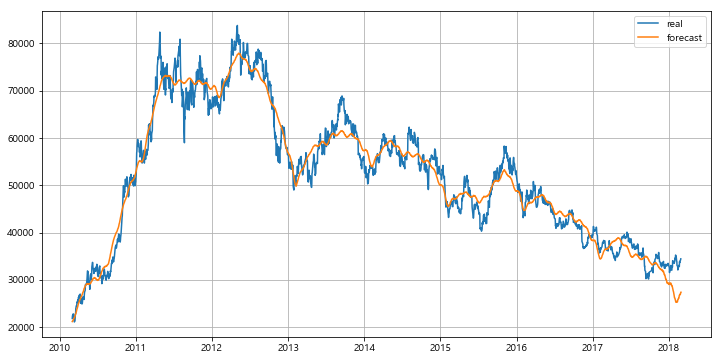

In [84]:
plt.figure(figsize=(12 ,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [91]:
# 003490 대한항공
start_date = '2010-03-01'
end_date = '2018-02-28'
KoreaAir = data.get_data_yahoo('003490.KS', start_date, end_date)
KoreaAir.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,58192.625000,59390.417969,58192.625000,59390.417969,58454.984375,303805
2010-03-03,59090.968750,59490.230469,58691.707031,59190.785156,58258.496094,189214
2010-03-04,58991.152344,60188.941406,58891.335938,59290.601562,58356.738281,357038
2010-03-05,59290.601562,61087.285156,59290.601562,60588.207031,59633.906250,782451
2010-03-08,61286.917969,63083.601562,61087.285156,62784.152344,61795.265625,945708


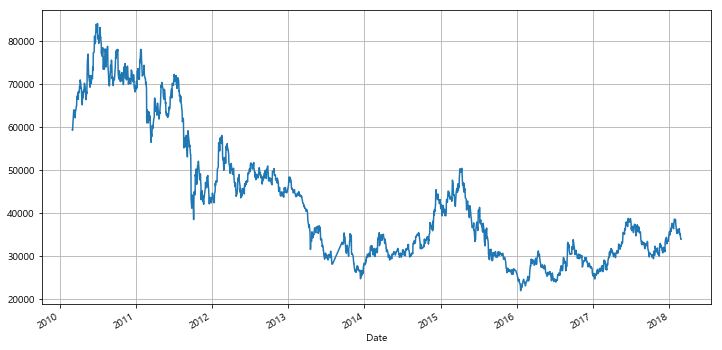

In [92]:
KoreaAir['Close'].plot(figsize=(12, 6), grid=True);

In [93]:
KoreaAir_trunc = KoreaAir[:'2017-11-30']
KoreaAir_trunc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,58192.625000,59390.417969,58192.625000,59390.417969,58454.984375,303805
2010-03-03,59090.968750,59490.230469,58691.707031,59190.785156,58258.496094,189214
2010-03-04,58991.152344,60188.941406,58891.335938,59290.601562,58356.738281,357038
2010-03-05,59290.601562,61087.285156,59290.601562,60588.207031,59633.906250,782451
2010-03-08,61286.917969,63083.601562,61087.285156,62784.152344,61795.265625,945708


In [97]:
df = pd.DataFrame({'ds': KoreaAir_trunc.index, 'y': KoreaAir_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,59390.417969
1,2010-03-03,59190.785156
2,2010-03-04,59290.601562
3,2010-03-05,60588.207031
4,2010-03-08,62784.152344


In [98]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [99]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1970,2018-02-24,34942.008480,30568.936188,39397.061625
1971,2018-02-25,34845.145220,30464.249833,38807.573120
1972,2018-02-26,35719.057199,31539.399639,40113.363155
1973,2018-02-27,35561.138431,31147.367122,39960.517249
1974,2018-02-28,35497.487623,31522.776565,39945.435577


C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


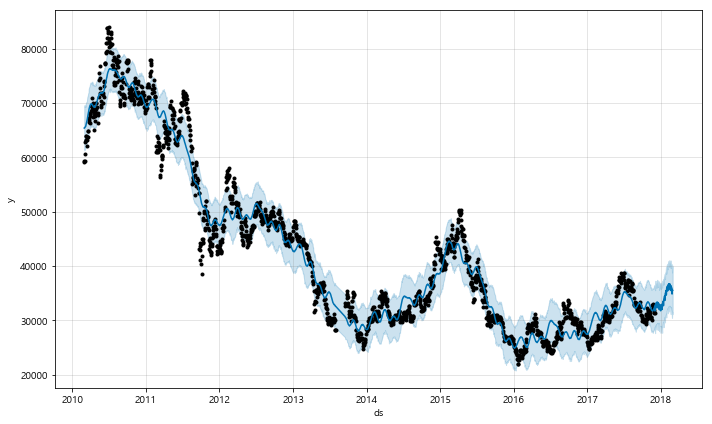

In [100]:
m.plot(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

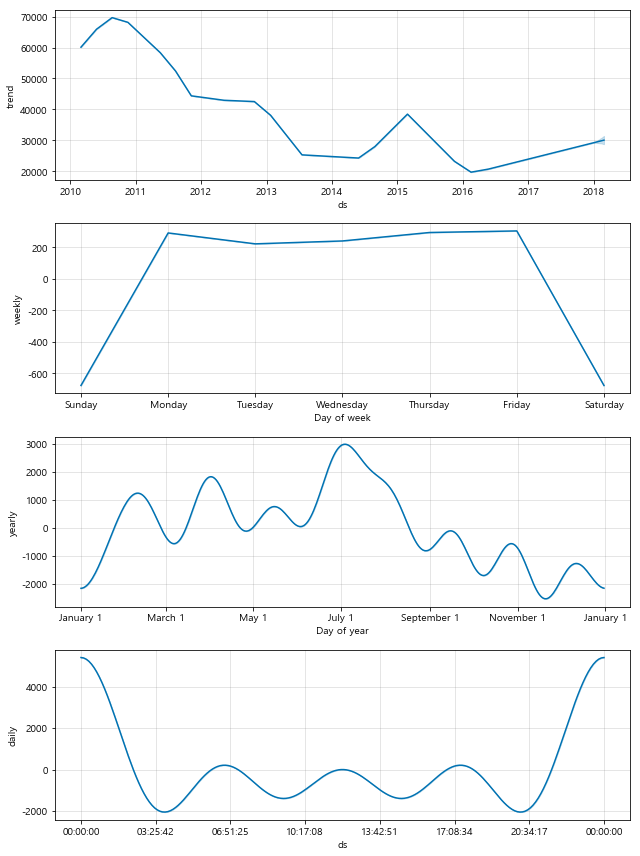

In [101]:
m.plot_components(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

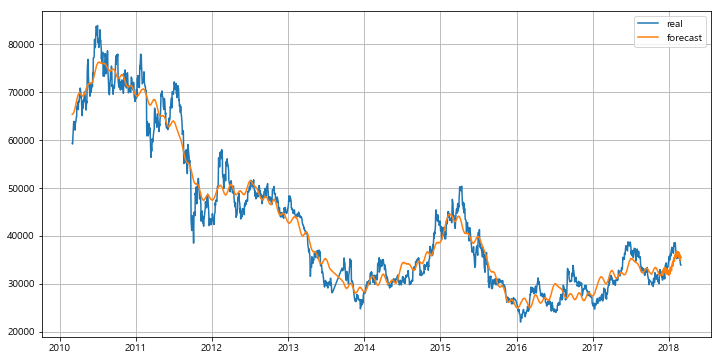

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(KoreaAir.index, KoreaAir['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 조금 특이한 형태의 데이터 forecast

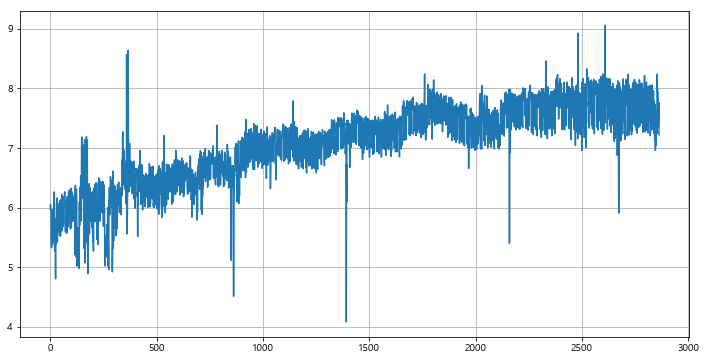

In [103]:
df = pd.read_csv('../data/05_example_wp_R2.csv', index_col=0)
df['y'].plot(figsize=(12, 6), grid=True);

- Logistic 성장형 그래프를 가진 데이터에 대한 Forecast

In [104]:
df['cap'] = 8.5
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


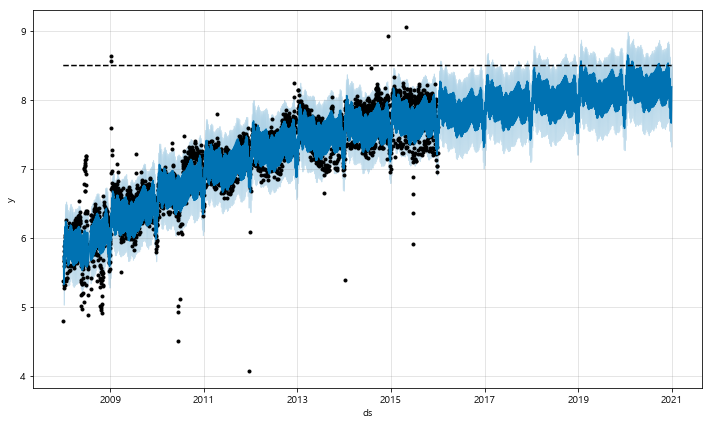

In [105]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

## 비트코인 데이터 fbprophet으로 분석하기

- 비트 코인 정보를 제공하는 사이트
- https://bitcoincharts.com/charts/bitstampUSD#rg60ztgSzm1g10zm2g25zv
- 다양한 정보를 제공하고 있으며
- raw data도 얻을 수 있다
- Load raw data를 클릭하면 raw data를 table 형태로 열람할 수 있다
- Symbol과 Time Period의 내용을 바꾸고 Draw 버튼을 누르면 접근 주소가 바뀐다 (주소 저장)
- Timee Period를 변경하면 그에 따라 URL정보가 바뀐다
- 조회 기간에 따라 주소값이 변경된다
- 주소를 얻을 수 있으므로 BeautifulSoup을 사용하기 편하다!

In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from selenium.webdriver.common.action_chains import ActionChains

import time

get_ipython().run_line_magic('matplotlib', 'inline')

- 필요한 모듈 import 

In [6]:
driver = webdriver.Chrome('../driver/chromedriver.exe')

In [9]:
driver.get('https://bitcoincharts.com/charts/korbitKRW#rg730ztgSzm1g10zm2g25zv')

- 크롬 드라이버를 실행
- 2년 짜리 URL 주소값으로 접근
- https://bitcoincharts.com/charts/bitstampUSD#rg730ztgSzm1g10zm2g25zv
- raw_data 메뉴가 가려짐
- Selenium으로 스크롤!

In [10]:
xpath = """//*[@id="content_chart"]/div/div[2]/a"""
variable = driver.find_element_by_xpath(xpath)
driver.execute_script('return arguments[0].scrollIntoView();', variable)
variable.click()

- 해당 Xpath가 나타날때까지 화면을 스크롤하라는 명령
- Load raw data에서 표를 읽어온다
- 웹페이지에 table이 여러개이다
- 다행히 table에 class가 data로 되어 있다

In [11]:
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', 'data')
table

<table class="data" id="chart_table" style="display: table;">
<thead>
<tr>
<th>Timestamp</th><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume (BTC)</th><th>Volume (Currency)</th><th>Weighted Price</th>
</tr>
</thead>
<tbody>
<tr><td>2019-10-13 00:00:00</td><td>9861000</td><td>9992000</td><td>9736000</td><td>9820000</td><td>119.23</td><td>1176454107.46</td><td>9867132.89</td></tr><tr><td>2019-10-14 00:00:00</td><td>9803500</td><td>9904500</td><td>9735000</td><td>9870000</td><td>120.82</td><td>1187266448.55</td><td>9827113.41</td></tr><tr><td>2019-10-15 00:00:00</td><td>9885000</td><td>9933500</td><td>9678500</td><td>9721000</td><td>181.95</td><td>1779494892</td><td>9780193.13</td></tr><tr><td>2019-10-16 00:00:00</td><td>9711000</td><td>9740000</td><td>9449000</td><td>9527000</td><td>225.14</td><td>2155866763.51</td><td>9575845.12</td></tr><tr><td>2019-10-17 00:00:00</td><td>9510000</td><td>9627000</td><td>9458000</td><td>9564000</td><td>161.86</td><td>1544157333.95</td><td

In [12]:
df = pd.read_html(str(table))
bitcoin = df[0]
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2019-10-13 00:00:00,9861000,9992000,9736000,9820000,119.23,1.176454e+09,9867132.89
1,2019-10-14 00:00:00,9803500,9904500,9735000,9870000,120.82,1.187266e+09,9827113.41
2,2019-10-15 00:00:00,9885000,9933500,9678500,9721000,181.95,1.779495e+09,9780193.13
3,2019-10-16 00:00:00,9711000,9740000,9449000,9527000,225.14,2.155867e+09,9575845.12
4,2019-10-17 00:00:00,9510000,9627000,9458000,9564000,161.86,1.544157e+09,9540181.93


- 잘 읽어진것 같다

In [13]:
bitcoin.to_csv('../data/05_bitcoin_history_new.csv', sep=',')

- 엑셀 저장

In [25]:
bitcoin=pd.read_csv('../data/05_bitcoin_history_new.csv', index_col=0)
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2019-10-13 00:00:00,9861000,9992000,9736000,9820000,119.23,1.176454e+09,9867132.89
1,2019-10-14 00:00:00,9803500,9904500,9735000,9870000,120.82,1.187266e+09,9827113.41
2,2019-10-15 00:00:00,9885000,9933500,9678500,9721000,181.95,1.779495e+09,9780193.13
3,2019-10-16 00:00:00,9711000,9740000,9449000,9527000,225.14,2.155867e+09,9575845.12
4,2019-10-17 00:00:00,9510000,9627000,9458000,9564000,161.86,1.544157e+09,9540181.93


In [26]:
bitcoin.tail()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
535,2021-03-31 00:00:00,70327000,71350000,68610500,70932500,341.41,2.405391e+10,70454149.45
536,2021-04-01 00:00:00,71040500,72349500,70601000,72240500,311.37,2.227890e+10,71550556.17
537,2021-04-02 00:00:00,72158500,73731500,71474500,73542500,292.58,2.132378e+10,72881463.60
538,2021-04-03 00:00:00,73546000,75399000,71500500,72182000,329.15,2.439079e+10,74101915.63
539,2021-04-04 00:00:00,72148000,74152500,71525500,74020000,175.61,1.284871e+10,73167084.66


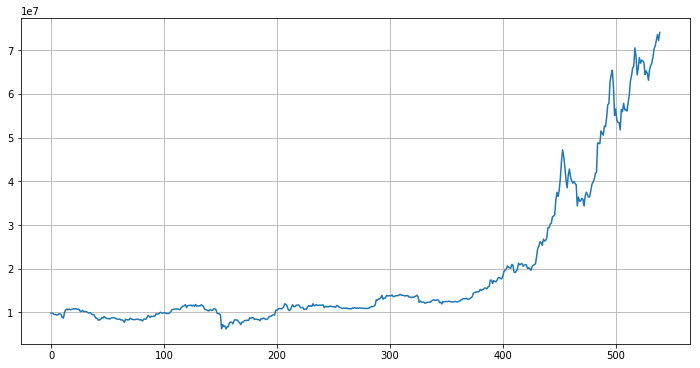

In [27]:
bitcoin['Close'].plot(figsize=(12, 6), grid=True)

In [28]:
df = pd.DataFrame({'ds': bitcoin['Timestamp'], 'y': bitcoin['Close']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

- 분석하고 싶은 항목(Close)만 가지고, Prophet을 적용

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


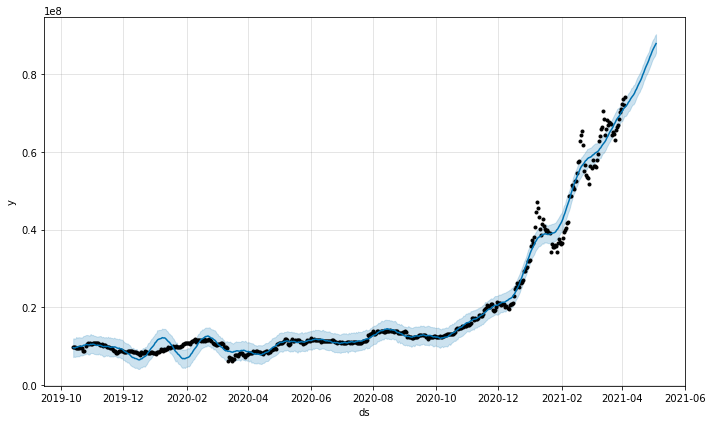

In [29]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

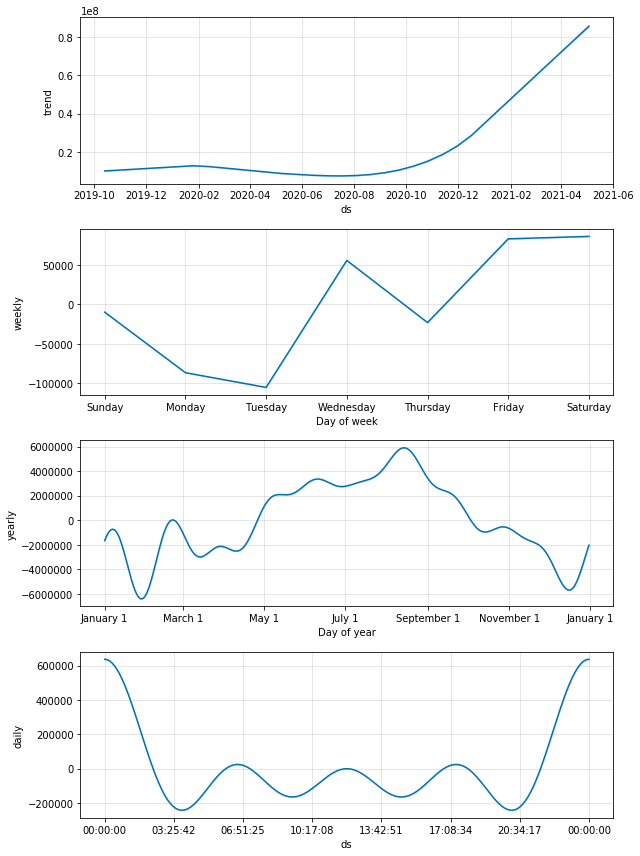

In [30]:
m.plot_components(forecast);

In [31]:
driver.close()